In [1]:
from qiskit import *
from qiskit.circuit.library import RXGate
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_distribution
import matplotlib.pyplot as plt, numpy as np

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The *Quantum Minesweeper* is a variation of the retro-esque classic game Minesweeper, with the catch that the contents of a tile (bomb or not) can be **predetermined.** 

We start by creating a Photon Qubit and a Bomb Qubit, and then bringing the Photon Qubit into a **reflection-transmission superposition** using a Hadamard Gate. After we entangle the two, we superpose again just before measurement.

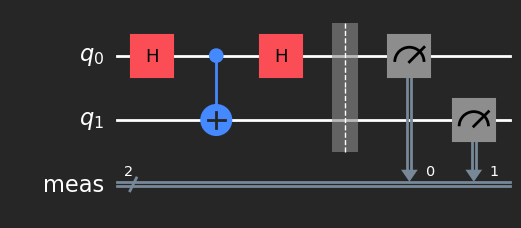

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.h(0)

qc.measure_all()
qc.draw('mpl', style = 'iqx-dark')

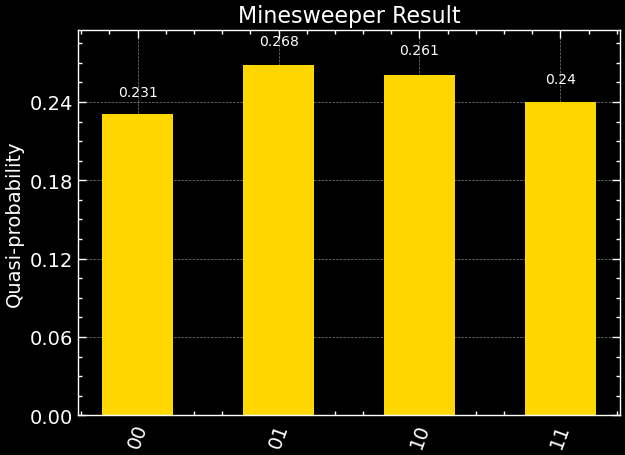

In [3]:
simulator = QasmSimulator()
job = simulator.run(qc, shots = 1000)
counts = job.result().get_counts(qc)

plot_distribution(counts, color = 'gold', title = 'Minesweeper Result')

The *Quantum Zeno Effect* is a phenomenon where a quantum evolution is prevented by frequently measurement. In this game, we can use this effect to our advantage to determine the tile's contents without triggering the bomb. This is done by **enhancing the beamsplitter reflectivity,** so the photon's overwhemingly likely to be reflected back and to avoid bombs along its path.

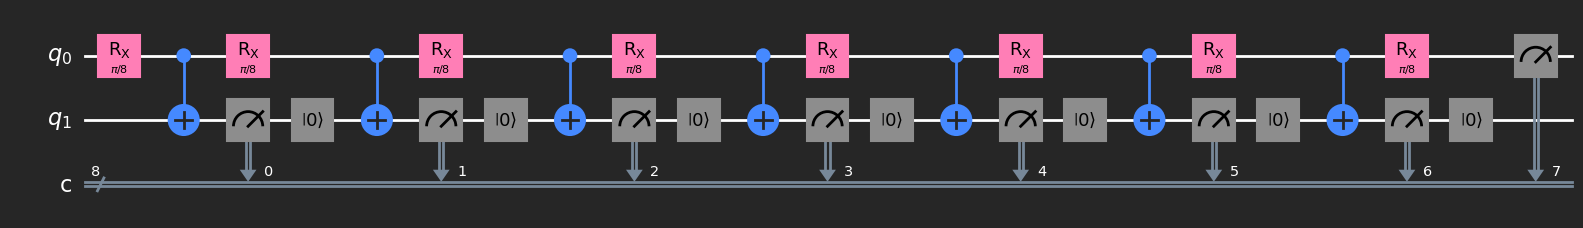

In [4]:
cycles = 8
theta = np.pi / cycles

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

for cycle in range(cycles - 1):
    
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1], cr[cycle])
    zeno_tester.reset(qr[1])

zeno_tester.append(RXGate(theta), [qr[0]])

zeno_tester.measure(qr[0], cr[cycles - 1])
zeno_tester.draw('mpl', style = 'iqx-dark')

Each ```RXGate``` is a beamsplitter, and CNOTs are used to entangle the Photon and Bomb Qubits. 

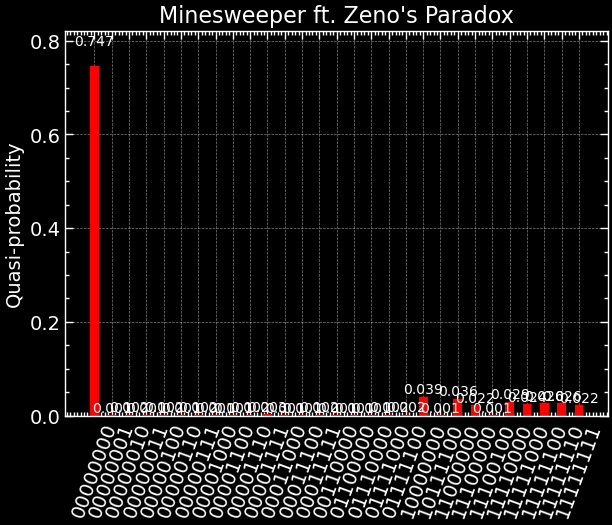

In [5]:
zeno_job = simulator.run(zeno_tester, shots = 1000)
zeno_counts = zeno_job.result().get_counts(zeno_tester)

plot_distribution(zeno_counts, color = 'red', title = 'Minesweeper ft. Zeno\'s Paradox')

The game is won an overwhelming majority of the time as represented, though there is a small chance that the bomb will be triggered, depending on the number of bombs and the size of the grid.